In [ ]:
!pip install pandas numpy matplotlib seaborn scikit-learn tensorflow yfinance



Enter stock symbol (e.g., AAPL, GOOG, TSLA): MSFT


[*********************100%***********************]  1 of 1 completed


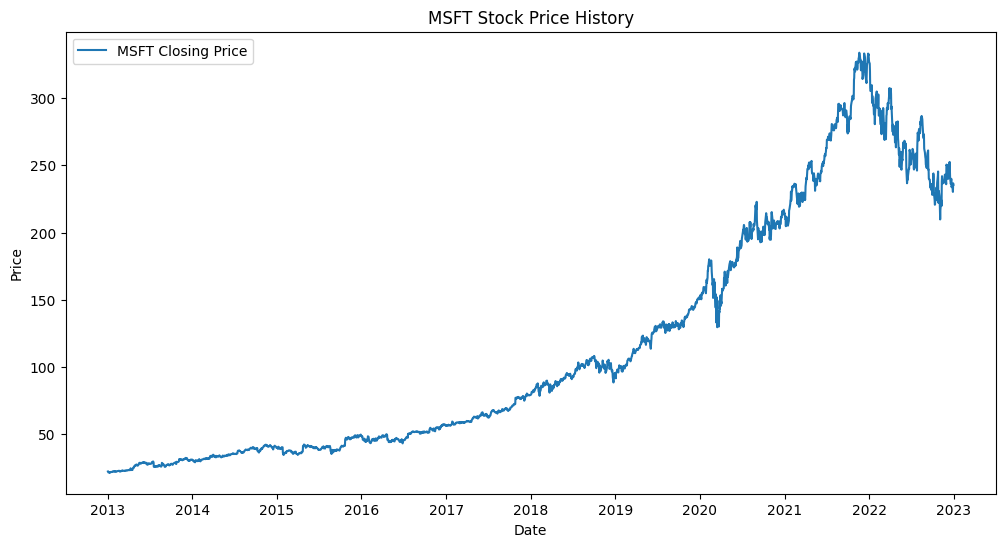

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


123/123 ━━━━━━━━━━━━━━━━━━━━ 12s 46ms/step - loss: 0.0107
Epoch 2/30
123/123 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 7.0146e-04
Epoch 3/30
123/123 ━━━━━━━━━━━━━━━━━━━━ 11s 56ms/step - loss: 5.3954e-04
Epoch 4/30
123/123 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 5.0673e-04
Epoch 5/30
123/123 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - loss: 4.1939e-04
Epoch 6/30
123/123 ━━━━━━━━━━━━━━━━━━━━ 11s 60ms/step - loss: 4.1744e-04
Epoch 7/30
123/123 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 4.0347e-04
Epoch 8/30
123/123 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - loss: 2.8854e-04
Epoch 9/30
123/123 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - loss: 4.4250e-04
Epoch 10/30
123/123 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - loss: 3.6116e-04
Epoch 11/30
123/123 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - loss: 3.5888e-04
Epoch 12/30
123/123 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 3.5712e-04
Epoch 13/30
123/123 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 4.3760e-04
Epoch 14/30
123/123 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - loss: 3.1954

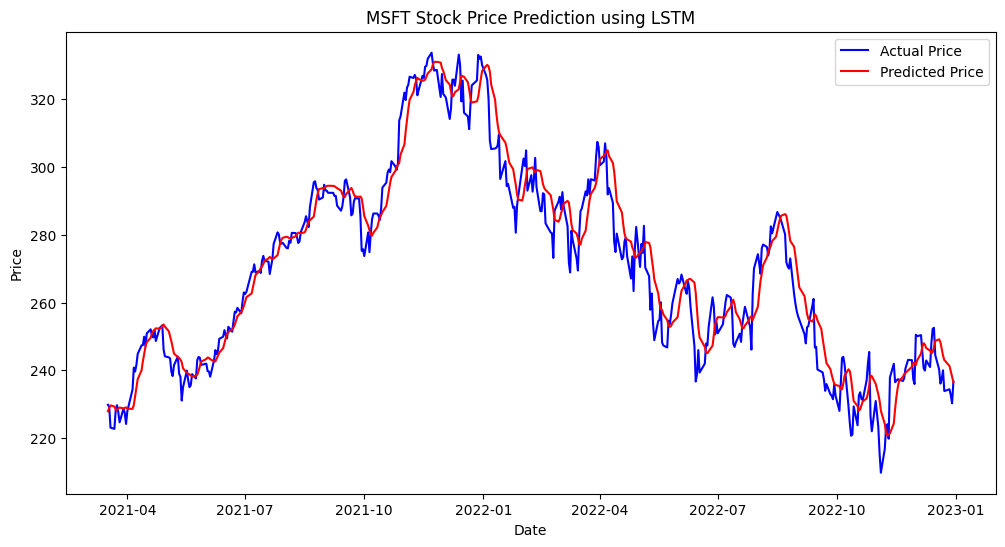

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# 📌 Step 1: Get User Input for Stock Symbol
stock_symbol = input("Enter stock symbol (e.g., AAPL, GOOG, TSLA): ").upper()

# 📌 Step 2: Fetch Stock Data
df = yf.download(stock_symbol, start="2013-01-01", end="2023-01-01")

# Handle invalid stock symbols
if df.empty:
    print("❌ Invalid stock symbol or no data available.")
    exit()

# 📌 Step 3: Plot Stock Prices
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label=f"{stock_symbol} Closing Price")
plt.title(f"{stock_symbol} Stock Price History")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

# 📌 Step 4: Data Preprocessing
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(df["Close"].values.reshape(-1,1))

# Split Data into Training & Testing
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Function to Create Data Sequences
def create_dataset(data, time_step=50):
    X, Y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i+time_step), 0])
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 50
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Reshape Data for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# 📌 Step 5: Build LSTM Model
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)),
    Dropout(0.2),
    LSTM(units=50, return_sequences=False),
    Dropout(0.2),
    Dense(units=25),
    Dense(units=1)
])

model.compile(optimizer="adam", loss="mean_squared_error")

# 📌 Step 6: Train the Model
model.fit(X_train, y_train, batch_size=16, epochs=30)

# 📌 Step 7: Make Predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# 📌 Step 8: Plot Predictions vs Actual Prices
plt.figure(figsize=(12,6))
plt.plot(df.index[-len(y_test):], scaler.inverse_transform(y_test.reshape(-1,1)), label="Actual Price", color="blue")
plt.plot(df.index[-len(y_test):], predictions, label="Predicted Price", color="red")
plt.legend()
plt.title(f"{stock_symbol} Stock Price Prediction using LSTM")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()


In [ ]:
import keras.saving
keras.saving.save_model(model, "stock_model.keras")


In [ ]:
from google.colab import files
files.download("stock_model.keras")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>